In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
%cd "../.."

/home/hazzu/Code/opencv_streamlit


000000154947.jpg


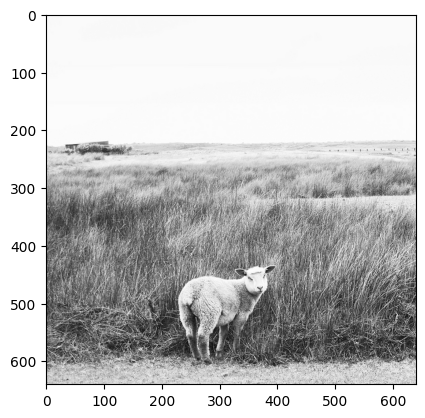

In [4]:
import os
import cv2
from matplotlib import pyplot as plt

DATASET_DIR = "./services/image_search_engine/val2017"
images_name = os.listdir(os.path.join(DATASET_DIR, "images"))

for image_name in images_name:
    if image_name == "000000186873.jpg":
        continue

    image_path = os.path.join(DATASET_DIR, "images", image_name)
    image = cv2.imread(image_path)

    h, w = image.shape[:2]
    if w == h:
        print(image_name)
        plt.imshow(image)
        break

In [6]:
import cv2
from matplotlib import pyplot as plt

orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

train_image_name = "services/image_search_engine/val2017/images/000000154947.jpg"
image_name = "services/image_search_engine/val2017/images/000000186873.jpg"

image = cv2.imread(image_name)
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.imsave(
#     "services/image_search_engine/flow_images/original.jpg",
#     cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
# )

train_image = cv2.imread(train_image_name)
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imsave(
    "services/image_search_engine/flow_images/train_image.jpg",
    cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB),
)

gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.subplot(1, 2, 2)
# plt.imshow(gray_scale, cmap="gray")
# plt.imsave(
#     "services/image_search_engine/flow_images/gray_scale.jpg",
#     gray_scale,
#     cmap="gray",
# )
# plt.show()

train_gray_scale = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)
# plt.subplot(1, 2, 2)
# plt.imshow(gray_scale, cmap="gray")
plt.imsave(
    "services/image_search_engine/flow_images/train_gray_scale.jpg",
    train_gray_scale,
    cmap="gray",
)
# plt.show()

gray_scales = [
    gray_scale,
    cv2.rotate(gray_scale, cv2.ROTATE_90_CLOCKWISE),
    cv2.rotate(gray_scale, cv2.ROTATE_180),
    cv2.rotate(gray_scale, cv2.ROTATE_90_COUNTERCLOCKWISE),
]
# for i in range(4):
#     plt.subplot(2, 2, i + 1)
#     plt.imshow(gray_scales[i], cmap="gray")
#     plt.imsave(
#         f"services/image_search_engine/flow_images/gray_scale_{i * 90}.jpg",
#         gray_scales[i],
#         cmap="gray",
#     )
# plt.show()

train_kp, train_des = orb.detectAndCompute(train_gray_scale, None)
train_keypoint_image = cv2.drawKeypoints(
    train_gray_scale,
    train_kp,
    None,
    color=(0, 255, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT,
)
plt.imsave(
    f"services/image_search_engine/flow_images/train_keypoint.jpg", train_keypoint_image
)

for i in range(4):
    query_kp, query_des = orb.detectAndCompute(gray_scales[i], None)
    keypoint_image = cv2.drawKeypoints(
        gray_scales[i],
        query_kp,
        None,
        color=(0, 255, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT,
    )
    # plt.subplot(2, 2, i + 1)
    # plt.imshow(cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB))
    # plt.imsave(
    #     f"services/image_search_engine/flow_images/keypoint_{i * 90}.jpg",
    #     cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB),
    # )

    matches = bf.match(query_des, train_des)
    matching_image = cv2.drawMatches(
        gray_scales[i], query_kp, train_gray_scale, train_kp, matches, None
    )

    print(len(matches), len(query_kp), len(train_kp))
    plt.imsave(
        f"services/image_search_engine/flow_images/matching_{i * 90}.jpg",
        matching_image,
    )

138 500 500
139 500 500
139 500 500
139 500 500
